## Import Data

In [1]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test)=cifar10.load_data()

print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))


from tensorflow.keras.utils import to_categorical

# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

170498071/170498071 [==============================] - 21s 0us/step
Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


# VGGNet


In [2]:
# Importing the necessary libraries, which we may or may not use. Its always good idea to import them befor (if you remember) else we can do it at any point of time no problem.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, ReLU
from tensorflow.keras import Model
class VGGNet:

    vgg16_configs = ((2, 64), (2, 128), (3, 256), (3, 512), (3, 512))

    def __init__(self, num_classes=10, input_shape=(32, 32, 3), configs = vgg16_configs, name='VGG16'):
        self.num_classes = num_classes
        self.input_shape = input_shape
        self.configs = configs
        self.name = name

    def _vgg_block(self, x, filters, num_convs):
        for _ in range(num_convs):
            x = Conv2D(filters=filters, kernel_size =3, padding ='same')(x)
            x = BatchNormalization()(x)
            x = ReLU()(x)
        x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)
        return x

    def build(self):

        # VGGNet
        input_layer = Input(shape=self.input_shape)
        x = input_layer
        for (num_conv, filter) in self.configs:
            x = self._vgg_block(x, filters=filter, num_convs=num_conv)

        # Fully connected layers
        x = Flatten()(x)
        x = Dense(units=256, activation='relu')(x)
        x = Dense(units=256, activation='relu')(x)
        output = Dense(units=self.num_classes, activation='softmax')(x)

        # Create the model
        model = Model(inputs=input_layer, outputs=output, name=self.name)
        return model

configs = ((2, 64), (2, 128), (3, 256), (3, 512), (3, 512))
vgg16 = VGGNet(num_classes=10, input_shape=(32, 32, 3), configs=configs).build()

In [4]:
from tensorflow.keras.optimizers import Adam
opt = Adam(
    learning_rate=0.0002,
    beta_1=0.96,
    beta_2=0.9994,
    epsilon=4e-08,
    amsgrad=False,
    name='Adam')

vgg16.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
vgg16.summary()

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                            

In [ ]:
history1 = vgg16.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))
evaluation = vgg16.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

Epoch 1/20
1563/1563 [==============================] - 3382s 2s/step - loss: 0.8015 - accuracy: 0.7237 - val_loss: 1.1087 - val_accuracy: 0.6545
Epoch 2/20
 437/1563 [=======>......................] - ETA: 16:32:33 - loss: 0.6167 - accuracy: 0.7874

In [6]:
evaluation = vgg16.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))


313/313 [==============================] - 3s 10ms/step - loss: 0.7861 - accuracy: 0.8274
Test Accuracy: 0.8274000287055969


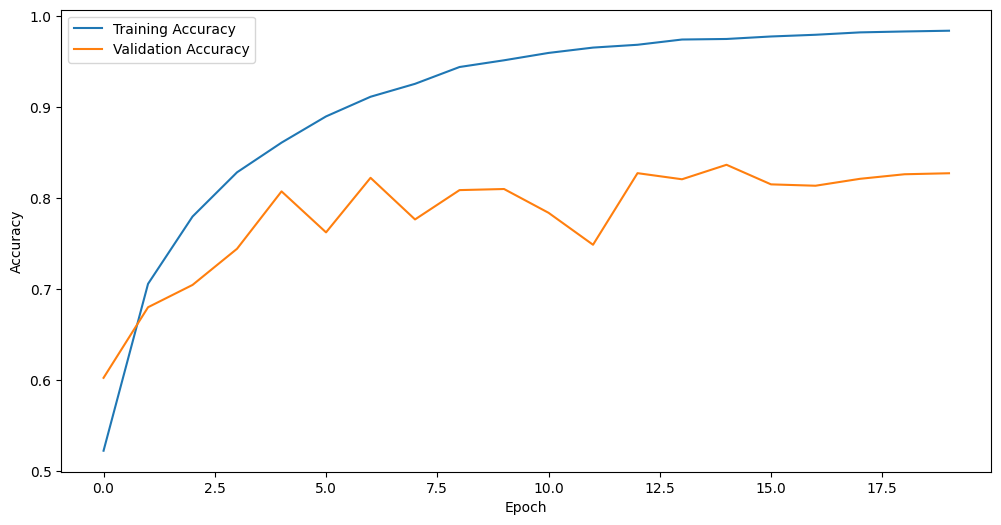

In [7]:
import matplotlib.pyplot as plt
# Vẽ biểu đồ accuracy và loss trong quá trình huấn luyện
plt.figure(figsize=(12, 6))
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

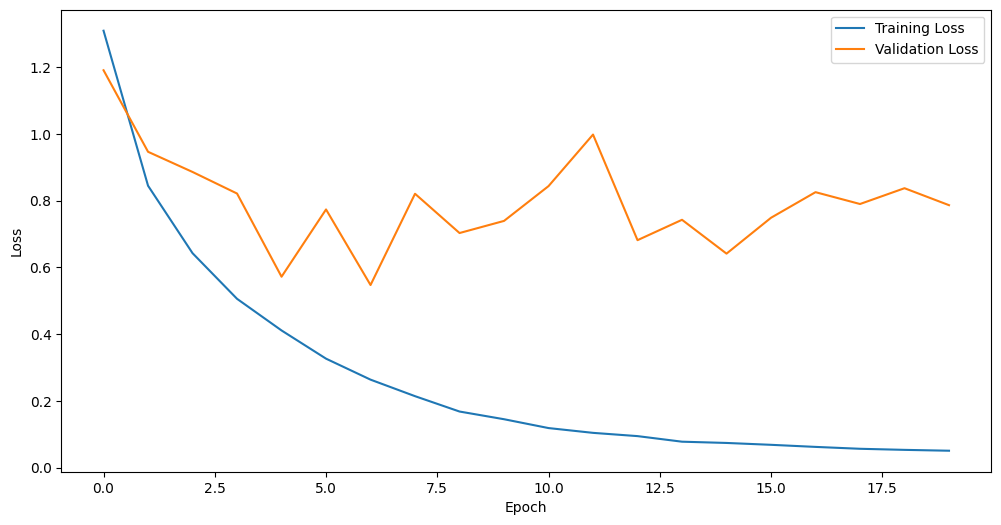

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# AlexNet

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models, losses

def alexnet(img_input, classes=10):
  # 1st conv layer
  x = Conv2D(96, (11, 11), strides=(4, 4), padding='same', activation='relu', kernel_initializer='uniform')(img_input)  # valid
  x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
  x = BatchNormalization()(x)

  # 2nd conv layer
  x = Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform')(x)
  x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
  x = BatchNormalization()(x)

  # 3rd conv layer
  x = Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform')(x)
  x = BatchNormalization()(x)

  # 4th conv layer
  x = Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform')(x)
  x = BatchNormalization()(x)

  # 5th conv layer
  x = Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform')(x)
  x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
  x = BatchNormalization()(x)

  # flattening before sending to fully connected layers
  x = Flatten()(x)
  # fully connected layers
  x = Dense(4096, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = BatchNormalization()(x)
  x = Dense(1000, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = BatchNormalization()(x)

  # output layer
  out = Dense(classes, activation='softmax')(x)
  return out


# defining input image size according to cifar10
img_input = Input(shape=(32, 32, 3))
output = alexnet(img_input)
alexnet = Model(img_input, output)
alexnet.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 8, 8, 96)          34944     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 4, 4, 96)          0         
 ng2D)                                                           
                                                                 
 batch_normalization_27 (Ba  (None, 4, 4, 96)          384       
 tchNormalization)                                               
                                                                 
 conv2d_37 (Conv2D)          (None, 4, 4, 256)         614656    
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 2, 2, 256)         0   

In [29]:
from tensorflow.keras.optimizers import Adam
opt = Adam(
    learning_rate=0.0002,
    beta_1=0.96,
    beta_2=0.9994,
    epsilon=4e-08,
    amsgrad=False,
    name='Adam')
alexnet.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
alexnet.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 8, 8, 96)          34944     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 4, 4, 96)          0         
 ng2D)                                                           
                                                                 
 batch_normalization_27 (Ba  (None, 4, 4, 96)          384       
 tchNormalization)                                               
                                                                 
 conv2d_37 (Conv2D)          (None, 4, 4, 256)         614656    
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 2, 2, 256)         0   

In [30]:
history = alexnet.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))
evaluation = alexnet.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

Epoch 1/20
1563/1563 [==============================] - 25s 12ms/step - loss: 1.9233 - accuracy: 0.3649 - val_loss: 1.7682 - val_accuracy: 0.4305
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4206 - accuracy: 0.5023 - val_loss: 1.2570 - val_accuracy: 0.5421
Epoch 3/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2178 - accuracy: 0.5724 - val_loss: 1.3963 - val_accuracy: 0.5330
Epoch 4/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0817 - accuracy: 0.6189 - val_loss: 1.2416 - val_accuracy: 0.5783
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9546 - accuracy: 0.6648 - val_loss: 1.1710 - val_accuracy: 0.5873
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8455 - accuracy: 0.7042 - val_loss: 1.2298 - val_accuracy: 0.5883
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7401 - accuracy: 0.7377 - val_loss: 1.2250 -

In [31]:
evaluation = alexnet.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))


313/313 [==============================] - 2s 6ms/step - loss: 1.6621 - accuracy: 0.6557
Test Accuracy: 0.6557000279426575


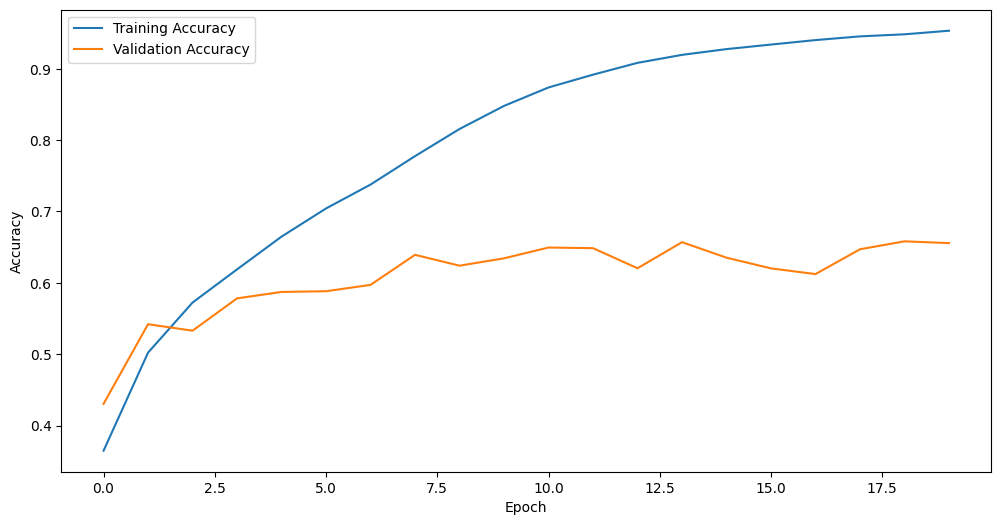

In [32]:
import matplotlib.pyplot as plt
# Vẽ biểu đồ accuracy và loss trong quá trình huấn luyện
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

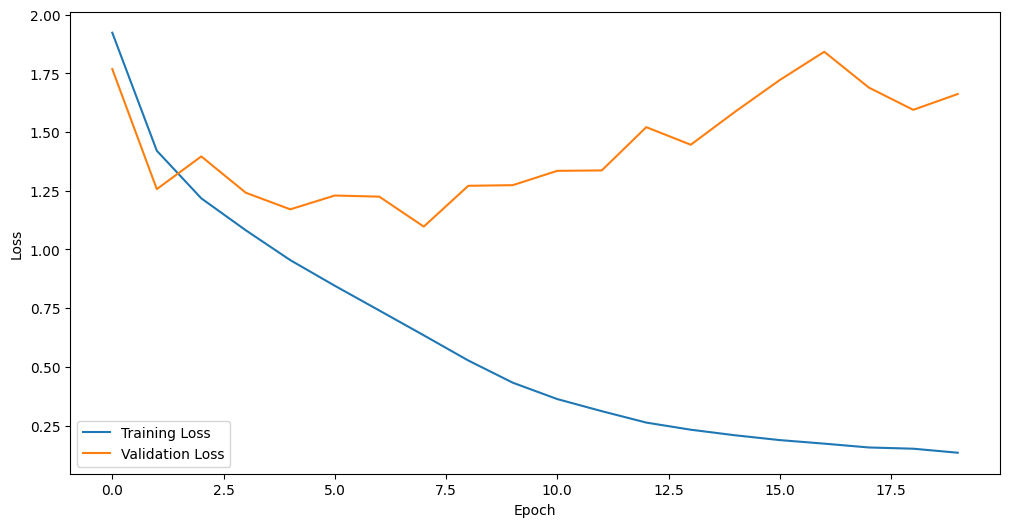

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()